In [80]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.

### Вспоним и поговорим немного о Logloss

In [33]:
from sklearn.metrics import log_loss, precision_score, recall_score, accuracy_score

<img src='Log_loss_graph.png'>

In [27]:
from sklearn.datasets import load_breast_cancer

breast_data = load_breast_cancer()
X_breast = breast_data.data
Y_breast = breast_data.target


### Обучаем логистическую регрессию
lr = LogisticRegression()
lr.fit(X_breast, Y_breast)

### Получаем предсказания на трэйновом множестве - вероятности и 0/1
predict_probas = lr.predict_proba(X_breast)
predicts = lr.predict(X_breast)

In [35]:
### считаем то что обычно считали - точность

print (accuracy_score(Y_breast, predicts))

0.959578207381


In [36]:
### Смотрим на presicion и recall

print ('Precision: ', precision_score(Y_breast, predicts))
print ('Recall: ', recall_score(Y_breast, predicts))

Precision:  0.961325966851
Recall:  0.974789915966


In [39]:
### Смотрим log-loss

print ('Log-loss: ', log_loss(Y_breast, predict_probas))

Log-loss:  0.0921459149909


## Начнем разговор не о моделях, а о том, на чем обучаются наши алгоритмы - о признаках

In [78]:
from sklearn.datasets import load_boston

In [6]:
data = load_boston()

X = data.data
Y = data.target
feature_names = data.feature_names

In [55]:
X_dataframe = pd.DataFrame(data=X, columns=feature_names)

In [60]:
X_dataframe.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


(array([   2.,    4.,   14.,   45.,  177.,  151.,   69.,   22.,   13.,    9.]),
 array([ 3.561 ,  4.0829,  4.6048,  5.1267,  5.6486,  6.1705,  6.6924,
         7.2143,  7.7362,  8.2581,  8.78  ]),
 <a list of 10 Patch objects>)

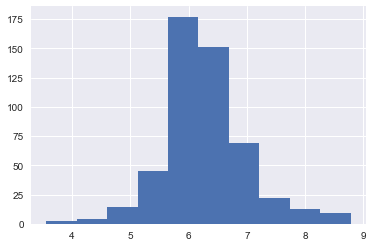

In [70]:
plt.hist(X_dataframe['RM'])

## Нормализация фич - что это такое

Нормализация признаков - это приведение значений признаков к другому масштабу

Есть два основных вида нормализации - Min-Max scaling и Normal scaling

In [71]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

<img src='min_max_scaling.png'>

<img src='standard_scaling.jpg'>

In [73]:
### попробуем нормализовать первым методов признак RM

min_max_scaler = MinMaxScaler()
rm_min_max_scaled = min_max_scaler.fit_transform(X_dataframe['RM'])

C:\Users\isafiulin\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\isafiulin\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


(array([   2.,    4.,   14.,   45.,  177.,  151.,   69.,   22.,   13.,    9.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

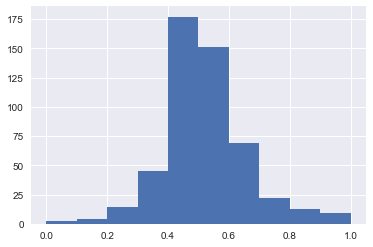

In [74]:
plt.hist(rm_min_max_scaled)

In [76]:
### попробуем нормализовать признак RM c помощью standard scaling

standard_scaler = StandardScaler()
rm_standard_scaled = min_max_scaler.fit_transform(X_dataframe['RM'])

C:\Users\isafiulin\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\isafiulin\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


(array([   2.,    4.,   14.,   45.,  177.,  151.,   69.,   22.,   13.,    9.]),
 array([-3.88024936, -3.13672   , -2.39319063, -1.64966127, -0.90613191,
        -0.16260255,  0.58092682,  1.32445618,  2.06798554,  2.81151491,
         3.55504427]),
 <a list of 10 Patch objects>)

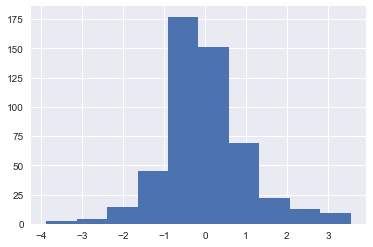

In [77]:
plt.hist(rm_standard_scaled)

### Зачем и когда это нужно

Самый простой пример - это когда у нас в алгоритме присутствуют ***расстояния***. Например, метод ***KNN***

Почему это важно в этом случае?

Пример: пусть один признак у нас разбросан в диапазоне от 0 до 1, а второй - от 100 до 200

Более сложные примеры - линейный модели

Попробуем вспомнить, как работают они и почему это для них может быть важно

### Когда это не нужно 

Давайте все вместе вспомним, как работают деревья

<img src='treegraph.gif'>

Ключевой момент - в алгоритмах, построенных на деревьях, в узлах происходит отсечения **порядка** - важно, в каком порядке находятся элементы по этому признаку. Сами значения признаков при этом не играют ключевой роли. Поэтому нормализация признаков в этом теоретически ***не играет важной роли***

### Попробуем попрактиковаться

In [81]:
lr_regressor = LinearRegression()
rf_regressor = RandomForestRegressor()